In [2]:
from tensorflow.python.keras import models, layers, optimizers
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("dataset/20210122-Kampiun Digilib Clean-jfam-jfunc.csv",encoding='latin-1')
df.head(5)

,source,org_id,doc_id,doc_title,doc_description,Job Family,Job Function,job_role,job_role_clean
0,Kampiun,NaN,27243,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,5.2.3 Learning &amp; Development,Learning & Development
1,Kampiun,NaN,29134,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,5.2.3 Learning &amp; Development,Learning & Development
2,Kampiun,NaN,28690,ILC : Securing Revenue Witel Riau Daratan 2017,NaN,STRATEGIC PLAN & DEVELOPMENT,Strategic Planning,2.1.1 Internal &amp; External Analysis,Internal & External Analysis
3,Kampiun,NaN,33756,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR,NaN,DIGITAL & ICT,Telecommunication,1.1.6 Access Network O&amp;M,Access Network Operation & Maintenance
4,Kampiun,NaN,38567,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL NTB,NaN,DIGITAL & ICT,Telecommunication,1.1.2 Access Network Design &amp; Planning,Access Network Design & Planning


In [5]:
df['title_desc'] = df['doc_title'].fillna('')+" "+df['doc_description'].fillna('')

In [7]:
df.drop([
    'source', 'org_id', 'doc_id', 'job_role','job_role_clean'
], axis=1, inplace=True)
df

,doc_title,doc_description,Job Family,Job Function,title_desc
0,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,Case Study 1 tahun Magang di Kementerian BUMN
1,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,Case Study 1 tahun Magang di Kementerian BUMN
2,ILC : Securing Revenue Witel Riau Daratan 2017,NaN,STRATEGIC PLAN & DEVELOPMENT,Strategic Planning,ILC : Securing Revenue Witel Riau Daratan 2017
3,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR,NaN,DIGITAL & ICT,Telecommunication,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR
4,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL NTB,NaN,DIGITAL & ICT,Telecommunication,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL ...
...,...,...,...,...,...
11296,PENTINGNYA LOYALITAS PELANGGAN,Ditengah-tengah persaingan berbagai bisnis/ind...,COMMERCE & RELATION,Sales,PENTINGNYA LOYALITAS PELANGGAN Ditengah-tengah...
11297,Uji Terima Online dalam Proyek Digitalisasi SP...,1. Latar Belakang \n ...,DIGITAL & ICT,Information Technology,Uji Terima Online dalam Proyek Digitalisasi SP...
11298,REKON TAGIHAN PSB TA TO TELKOM WITEL PURWOKERTO,CARA REKON TAGIHAN PSB TA KE TELKOM \n \n1. A...,BUSINESS ENABLER/ENTERPRISE MGT,Education,REKON TAGIHAN PSB TA TO TELKOM WITEL PURWOKE...
11299,TDSCC (Telkom DIGITAL SOLUTION CARE CENTER) G...,#NAME?,DIGITAL & ICT,Information Technology,TDSCC (Telkom DIGITAL SOLUTION CARE CENTER) G...


In [14]:
import re
def preprocess(text):
    
    text = str(text).lower()
    text = re.sub(r'^<div id="video.*>&nbsp;', '', text) # Video-review part
    text = re.sub('https?://[A-Za-z0-9./]+', '', text) # URLs
    
    # Remove HTML Tag
    text = re.sub('<.*?>', '', text)    
    
    # Remove everything in bracket    
    text = re.sub('\[[^)]*\]', '', text)    
    
    text = re.sub('[/]+', ' ', text) # word1/word2 to word1 word2
    # Remove non-alphanumeric characters (but not - and _, might be useful for tokenization)
    text = re.sub('[^A-Za-z0-9-_ ]+', '', text)

    # Remove words that are digits only
    text = re.sub('\b\d+\b', '', text)                
    
    return text

In [18]:
df['title_desc'] = df['title_desc'].apply(preprocess)

In [19]:
df.head(5)

,doc_title,doc_description,Job Family,Job Function,title_desc
0,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn
1,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn
2,ILC : Securing Revenue Witel Riau Daratan 2017,NaN,STRATEGIC PLAN & DEVELOPMENT,Strategic Planning,ilc securing revenue witel riau daratan 2017
3,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR,NaN,DIGITAL & ICT,Telecommunication,sikat habis ftth unspec dengan mini olt outdoor
4,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL NTB,NaN,DIGITAL & ICT,Telecommunication,proses pengajuan capex ftth indihome di witel ...


## Remove Stopwords

In [24]:
from IPython.display import display, clear_output
import time
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize

len_df = len(df)
start = 0
# end   = 960205
t1 = time.time()
for entry in df['title_desc']:    
    clear_output(wait=True)
    res = [word for word in word_tokenize(entry) if not word in stopwords.words('english') and not word in stopwords.words('indonesian')]
    res = (" ").join(res)  
    p = (start/len_df)*100
    display("%.7f" % p +" - "+str(start))
    df.loc[start,'clean_title_desc'] = res
    if start >= len_df:
        break
    start = start+1
    
t2 = time.time()
print('Duration: {0:.2f}s'.format(round(t2-t1,2)))

'99.9911512 - 11300'

Duration: 1008.54s


In [25]:
df.head(5)

,doc_title,doc_description,Job Family,Job Function,title_desc,clean_title_desc
0,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn,case study 1 magang kementerian bumn
1,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn,case study 1 magang kementerian bumn
2,ILC : Securing Revenue Witel Riau Daratan 2017,NaN,STRATEGIC PLAN & DEVELOPMENT,Strategic Planning,ilc securing revenue witel riau daratan 2017,ilc securing revenue witel riau daratan 2017
3,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR,NaN,DIGITAL & ICT,Telecommunication,sikat habis ftth unspec dengan mini olt outdoor,sikat habis ftth unspec mini olt outdoor
4,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL NTB,NaN,DIGITAL & ICT,Telecommunication,proses pengajuan capex ftth indihome di witel ...,proses pengajuan capex ftth indihome witel ntb


## Save & Reload Data

In [27]:
# Save preprocessed data to load further
# df.to_csv('dataset/[PREPROCESSED]20210122-Kampiun Digilib Clean-jfam-jfunc.csv')

In [107]:
# Reload Data
df = pd.read_csv('dataset/[PREPROCESSED]20210122-Kampiun Digilib Clean-jfam-jfunc.csv', index_col=0)

In [108]:
df.isna().sum()

doc_title            18
doc_description     241
Job Family            0
Job Function          0
title_desc            0
clean_title_desc      0
dtype: int64

In [109]:
df['Job Family'].value_counts()

DIGITAL & ICT                      3817
COMMERCE & RELATION                2880
BUSINESS ENABLER/ENTERPRISE MGT    2206
STRATEGIC PLAN & DEVELOPMENT       2169
RISK & COMPLIANCE                   229
Name: Job Family, dtype: int64

In [6]:
df.groupby('Job Function').size()/df.shape[0]

Job Function
Business Development            0.074241
Business Effectiveness          0.081940
DIGITAL PRODUCT & SERVICE       0.132820
Education                       0.045394
Finance                         0.050880
General Affairs                 0.024423
Human Capital                   0.074507
Information Technology          0.077869
LEGAL & COMPLIANCE              0.010972
Marketing                       0.133351
Relationship Management         0.026546
Risk Management                 0.009291
Sales                           0.081940
Social Community Development    0.013008
Strategic Planning              0.035749
Telecommunication               0.127068
dtype: float64

df drop Job Family Risk & Compliance because of data imbalance

In [7]:
df[df['Job Family'] != 'RISK & COMPLIANCE']

,doc_title,doc_description,Job Family,Job Function,title_desc,clean_title_desc
0,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn,case study 1 magang kementerian bumn
1,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn,case study 1 magang kementerian bumn
2,ILC : Securing Revenue Witel Riau Daratan 2017,NaN,STRATEGIC PLAN & DEVELOPMENT,Strategic Planning,ilc securing revenue witel riau daratan 2017,ilc securing revenue witel riau daratan 2017
3,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR,NaN,DIGITAL & ICT,Telecommunication,sikat habis ftth unspec dengan mini olt outdoor,sikat habis ftth unspec mini olt outdoor
4,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL NTB,NaN,DIGITAL & ICT,Telecommunication,proses pengajuan capex ftth indihome di witel ...,proses pengajuan capex ftth indihome witel ntb
...,...,...,...,...,...,...
11296,PENTINGNYA LOYALITAS PELANGGAN,Ditengah-tengah persaingan berbagai bisnis/ind...,COMMERCE & RELATION,Sales,pentingnya loyalitas pelanggan ditengah-tengah...,loyalitas pelanggan ditengah-tengah persaingan...
11297,Uji Terima Online dalam Proyek Digitalisasi SP...,1. Latar Belakang \n ...,DIGITAL & ICT,Information Technology,uji terima online dalam proyek digitalisasi sp...,uji terima online proyek digitalisasi spbu sol...
11298,REKON TAGIHAN PSB TA TO TELKOM WITEL PURWOKERTO,CARA REKON TAGIHAN PSB TA KE TELKOM \n \n1. A...,BUSINESS ENABLER/ENTERPRISE MGT,Education,rekon tagihan psb ta to telkom witel purwoke...,rekon tagihan psb ta telkom witel purwokerto r...
11299,TDSCC (Telkom DIGITAL SOLUTION CARE CENTER) G...,#NAME?,DIGITAL & ICT,Information Technology,tdscc telkom digital solution care center go ...,tdscc telkom digital solution care center go o...


In [110]:
df.drop(df[df['Job Family'] == 'RISK & COMPLIANCE'].index, inplace = True)

In [111]:
df

,doc_title,doc_description,Job Family,Job Function,title_desc,clean_title_desc
0,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn,case study 1 magang kementerian bumn
1,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn,case study 1 magang kementerian bumn
2,ILC : Securing Revenue Witel Riau Daratan 2017,NaN,STRATEGIC PLAN & DEVELOPMENT,Strategic Planning,ilc securing revenue witel riau daratan 2017,ilc securing revenue witel riau daratan 2017
3,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR,NaN,DIGITAL & ICT,Telecommunication,sikat habis ftth unspec dengan mini olt outdoor,sikat habis ftth unspec mini olt outdoor
4,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL NTB,NaN,DIGITAL & ICT,Telecommunication,proses pengajuan capex ftth indihome di witel ...,proses pengajuan capex ftth indihome witel ntb
...,...,...,...,...,...,...
11296,PENTINGNYA LOYALITAS PELANGGAN,Ditengah-tengah persaingan berbagai bisnis/ind...,COMMERCE & RELATION,Sales,pentingnya loyalitas pelanggan ditengah-tengah...,loyalitas pelanggan ditengah-tengah persaingan...
11297,Uji Terima Online dalam Proyek Digitalisasi SP...,1. Latar Belakang \n ...,DIGITAL & ICT,Information Technology,uji terima online dalam proyek digitalisasi sp...,uji terima online proyek digitalisasi spbu sol...
11298,REKON TAGIHAN PSB TA TO TELKOM WITEL PURWOKERTO,CARA REKON TAGIHAN PSB TA KE TELKOM \n \n1. A...,BUSINESS ENABLER/ENTERPRISE MGT,Education,rekon tagihan psb ta to telkom witel purwoke...,rekon tagihan psb ta telkom witel purwokerto r...
11299,TDSCC (Telkom DIGITAL SOLUTION CARE CENTER) G...,#NAME?,DIGITAL & ICT,Information Technology,tdscc telkom digital solution care center go ...,tdscc telkom digital solution care center go o...


In [10]:
df.groupby('Job Family').size()/df.shape[0]

Job Family
BUSINESS ENABLER/ENTERPRISE MGT    0.199241
COMMERCE & RELATION                0.260116
DIGITAL & ICT                      0.344743
STRATEGIC PLAN & DEVELOPMENT       0.195900
dtype: float64

In [113]:
df['Job Family'].value_counts()

DIGITAL & ICT                      3817
COMMERCE & RELATION                2880
BUSINESS ENABLER/ENTERPRISE MGT    2206
STRATEGIC PLAN & DEVELOPMENT       2169
Name: Job Family, dtype: int64

### Alt 1: Balance Class

In [114]:
# Balance Class
sample_size = 2169 # needs to be less than the number of observations in the minority class
sample_df = df.groupby('Job Family').apply(lambda x: x.sample(sample_size))

In [115]:
sample_df = sample_df.reset_index(level=0, drop=True)

In [116]:
sample_df = sample_df.sort_index()

### Alt 2: Unbalance Class

In [72]:
# Unbalance Class
sample_df = df

In [117]:
sample_df.groupby("Job Family").size()

Job Family
BUSINESS ENABLER/ENTERPRISE MGT    2169
COMMERCE & RELATION                2169
DIGITAL & ICT                      2169
STRATEGIC PLAN & DEVELOPMENT       2169
dtype: int64

In [118]:
sample_df['word_count'] = sample_df['clean_title_desc'].str.split().str.len()

In [119]:
# sample_df.head(5)
sample_df[sample_df['word_count']<=4]

,doc_title,doc_description,Job Family,Job Function,title_desc,clean_title_desc,word_count
133,INSIDEN,INSIDEN jika tidak dilaorkan akan menjadi keru...,BUSINESS ENABLER/ENTERPRISE MGT,Education,insiden insiden jika tidak dilaorkan akan menj...,insiden insiden dilaorkan kerugian,4


In [120]:
result = [x for x in sample_df['word_count']]
print("Mean : {}".format(np.mean(result)))
print("Max  : {}".format(sample_df['word_count'].max()))
print("Min  : {}".format(sample_df['word_count'].min()))

Mean : 72.43764407561088
Max  : 1156
Min  : 4


In [78]:
sample_df.clean_title_desc[:3].values

array(['case study 1 magang kementerian bumn',
       'case study 1 magang kementerian bumn',
       'ilc securing revenue witel riau daratan 2017'], dtype=object)

In [121]:
X = sample_df.clean_title_desc.values
y = sample_df['Job Family'].values
# sample_df['Job Family'].value_counts()

In [80]:
# print(X.shape)
# print(y.shape)
X[:3]

array(['case study 1 magang kementerian bumn',
       'case study 1 magang kementerian bumn',
       'ilc securing revenue witel riau daratan 2017'], dtype=object)

In [81]:
X_train

array([[   0,    0,    0, ..., 1166,  124,  430],
       [   0,    0,    0, ...,  102,   27, 1750],
       [   0,    0,    0, ...,  308, 1928, 3034],
       ...,
       [   0,    0,    0, ...,   27,   65, 2162],
       [   0,    0,    0, ...,  113,  163,  434],
       [   0,    0,    0, ..., 2340,  933, 9995]])

## Train Test Split

In [122]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=22, test_size=0.1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=22, test_size=0.1)

In [83]:
print(X_train[144])
print(y_test[144])

detection counting mango fruits occluded condition using image analysis agriculture fruit farmers would helpful monitor estimate yield harvesting fruits optimize use materials required efficiently water consumption fertilizers agricultural chemical substances every different location study proposed method detecting counting number mangos occluded conditions evaluating color filter identifying specific characteristics fruit homogeneity fruit surface study fully made use information extracted created blobs conducting histogram filtering blob weighting evaluating blob gradient topography performing hierarchical clustering method lower efficiency cost need determine number clusters searched function method also improved providing information position number fruits result images information could used make precise detection images used experiment 150 mango images divided 30 training images 120 testing images results experiments showed method able detect mango precision false rates 9753 9928

In [123]:
# Convert all word to string
X_train = [str (item) for item in X_train]
X_valid = [str (item) for item in X_valid]
X_test = [str (item) for item in X_test]

## Tokenize Words

In [124]:
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence

MAX_FEATURES = 12000
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_valid = tokenizer.texts_to_sequences(X_valid)
X_test = tokenizer.texts_to_sequences(X_test)

In [86]:
X_train

[[73,
  786,
  2297,
  1348,
  343,
  2082,
  1877,
  59,
  75,
  2297,
  1348,
  343,
  2082,
  1877,
  1425,
  273,
  252,
  89,
  11,
  3,
  1474,
  935,
  1,
  220,
  57,
  597,
  13,
  592,
  1348,
  1474,
  256,
  842,
  143,
  1348,
  2,
  2297,
  343,
  2082,
  1877,
  53,
  8845,
  6259,
  952,
  9797,
  8141,
  2082,
  1877,
  330,
  2150,
  1,
  65,
  1455,
  12,
  786,
  2297,
  1348,
  343,
  2082,
  1877,
  2862,
  597,
  1203,
  75,
  75,
  89],
 [177,
  539,
  64,
  1996,
  568,
  2,
  440,
  312,
  8,
  120,
  394,
  58,
  8,
  2151,
  51,
  513,
  281,
  118,
  1390,
  70,
  9798,
  51,
  193,
  1138,
  299,
  96,
  245,
  451,
  1055,
  74,
  70,
  1405,
  245,
  4110,
  217,
  8846,
  123,
  119,
  76,
  572,
  569,
  237,
  13,
  1337,
  568,
  2,
  318,
  568,
  2,
  312,
  8,
  28,
  37,
  119,
  5142,
  1182,
  1567,
  14,
  211,
  37,
  119,
  53,
  1182,
  13,
  318,
  568,
  237,
  118,
  37,
  64,
  1996,
  3867,
  119,
  360,
  157,
  1905,
  2748,
  1300,


In [87]:
tokenizer.word_index['operasional']

81

In [88]:
# reverse index to word
reverse_word_index = dict([(value, key) for (key, value) in tokenizer.word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '') for i in text])

In [89]:
decode_review(X_train[144])

'detection counting fruits condition using image analysis fruit would monitor estimate fruits optimize use materials required efficiently water consumption agricultural every different location study proposed method counting number conditions evaluating color filter identifying specific characteristics fruit fruit study fully made use information created conducting filtering evaluating gradient performing clustering method lower efficiency cost need determine number clusters function method also improved providing information position number fruits result images information could used make detection images used experiment 150 images divided 30 training images 120 testing images results experiments showed method able detect precision rates respectively general result study presented total number fruit system images true positive conditions total fruits overall ratio recall precision rate respectively'

In [127]:
from sklearn.preprocessing import LabelEncoder

# Encode Label
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_valid = Encoder.fit_transform(y_valid)

In [128]:
# len(y_train)
y_train

array([2, 1, 2, ..., 1, 1, 1])

## Padding

In [129]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LENGTH = max(len(X_train) for X_train in X_train)
X_train = pad_sequences(X_train, maxlen=MAX_LENGTH)
X_valid = pad_sequences(X_valid, maxlen=MAX_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_LENGTH)

In [130]:
MAX_LENGTH

930

In [131]:
y_train

array([2, 1, 2, ..., 1, 1, 1])

## Build Model 1

In [132]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Embedding(
        input_dim = MAX_FEATURES,
        output_dim = 32,
        input_length = MAX_LENGTH
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25
    )
)

model.add(
    tf.keras.layers.LSTM(
        units=32
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25
    )
)

model.add(
    tf.keras.layers.Dense(
        units=1,
        activation='sigmoid'
    )
)

In [133]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 930, 32)           384000    
_________________________________________________________________
dropout_8 (Dropout)          (None, 930, 32)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 392,353
Trainable params: 392,353
Non-trainable params: 0
_________________________________________________________________


In [134]:
history = model.fit(X_train, y_train, batch_size=256, epochs=300, validation_data=(X_valid, y_valid))

Epoch 1/300
28/28 [==============================] - 9s 245ms/step - loss: 0.5460 - accuracy: 0.2517 - val_loss: -1.1998 - val_accuracy: 0.2446
Epoch 2/300
28/28 [==============================] - 6s 228ms/step - loss: -1.9344 - accuracy: 0.2450 - val_loss: -2.7721 - val_accuracy: 0.2446
Epoch 3/300
28/28 [==============================] - 6s 231ms/step - loss: -3.3482 - accuracy: 0.2517 - val_loss: -3.6614 - val_accuracy: 0.2446
Epoch 4/300
28/28 [==============================] - 7s 234ms/step - loss: -4.2882 - accuracy: 0.2479 - val_loss: -4.3109 - val_accuracy: 0.2446
Epoch 5/300
28/28 [==============================] - 6s 229ms/step - loss: -4.9750 - accuracy: 0.2441 - val_loss: -4.8690 - val_accuracy: 0.2446
Epoch 6/300
28/28 [==============================] - 6s 230ms/step - loss: -5.3613 - accuracy: 0.2504 - val_loss: -5.3931 - val_accuracy: 0.2446
Epoch 7/300
28/28 [==============================] - 6s 233ms/step - loss: -6.0355 - accuracy: 0.2481 - val_loss: -5.9017 - val_acc

28/28 [==============================] - 7s 234ms/step - loss: -45.7766 - accuracy: 0.4155 - val_loss: -35.1990 - val_accuracy: 0.3444
Epoch 57/300
28/28 [==============================] - 7s 233ms/step - loss: -46.9039 - accuracy: 0.4180 - val_loss: -36.0460 - val_accuracy: 0.3444
Epoch 58/300
28/28 [==============================] - 7s 240ms/step - loss: -47.9311 - accuracy: 0.4152 - val_loss: -36.0804 - val_accuracy: 0.3457
Epoch 59/300
28/28 [==============================] - 7s 236ms/step - loss: -48.4341 - accuracy: 0.4159 - val_loss: -37.1740 - val_accuracy: 0.3457
Epoch 60/300
28/28 [==============================] - 7s 236ms/step - loss: -48.5948 - accuracy: 0.4248 - val_loss: -37.6180 - val_accuracy: 0.3431
Epoch 61/300
28/28 [==============================] - 7s 236ms/step - loss: -49.4637 - accuracy: 0.4275 - val_loss: -38.4934 - val_accuracy: 0.3406
Epoch 62/300
28/28 [==============================] - 7s 234ms/step - loss: -50.5197 - accuracy: 0.4259 - val_loss: -38.9389 

28/28 [==============================] - 7s 233ms/step - loss: -85.6392 - accuracy: 0.4535 - val_loss: -64.2406 - val_accuracy: 0.3649
Epoch 112/300
28/28 [==============================] - 7s 234ms/step - loss: -83.2806 - accuracy: 0.4627 - val_loss: -64.8674 - val_accuracy: 0.3636
Epoch 113/300
28/28 [==============================] - 7s 233ms/step - loss: -86.6757 - accuracy: 0.4549 - val_loss: -65.5291 - val_accuracy: 0.3624
Epoch 114/300
28/28 [==============================] - 7s 234ms/step - loss: -86.9014 - accuracy: 0.4514 - val_loss: -65.9639 - val_accuracy: 0.3662
Epoch 115/300
28/28 [==============================] - 7s 236ms/step - loss: -89.6370 - accuracy: 0.4535 - val_loss: -66.5315 - val_accuracy: 0.3611
Epoch 116/300
28/28 [==============================] - 7s 251ms/step - loss: -89.4266 - accuracy: 0.4524 - val_loss: -67.0088 - val_accuracy: 0.3662
Epoch 117/300
28/28 [==============================] - 7s 238ms/step - loss: -89.0688 - accuracy: 0.4622 - val_loss: -67

Epoch 166/300
28/28 [==============================] - 7s 234ms/step - loss: -121.6942 - accuracy: 0.4754 - val_loss: -93.3586 - val_accuracy: 0.3752
Epoch 167/300
28/28 [==============================] - 7s 234ms/step - loss: -127.2031 - accuracy: 0.4580 - val_loss: -94.6863 - val_accuracy: 0.3726
Epoch 168/300
28/28 [==============================] - 7s 235ms/step - loss: -122.4204 - accuracy: 0.4757 - val_loss: -95.3444 - val_accuracy: 0.3713
Epoch 169/300
28/28 [==============================] - 7s 234ms/step - loss: -123.3380 - accuracy: 0.4755 - val_loss: -95.8110 - val_accuracy: 0.3700
Epoch 170/300
28/28 [==============================] - 7s 235ms/step - loss: -124.4603 - accuracy: 0.4726 - val_loss: -96.3947 - val_accuracy: 0.3713
Epoch 171/300
28/28 [==============================] - 7s 235ms/step - loss: -124.5505 - accuracy: 0.4690 - val_loss: -95.7351 - val_accuracy: 0.3713
Epoch 172/300
28/28 [==============================] - 7s 234ms/step - loss: -126.7758 - accuracy: 0

28/28 [==============================] - 7s 233ms/step - loss: -160.7121 - accuracy: 0.4712 - val_loss: -119.2775 - val_accuracy: 0.3764
Epoch 221/300
28/28 [==============================] - 7s 234ms/step - loss: -162.6762 - accuracy: 0.4695 - val_loss: -120.7097 - val_accuracy: 0.3739
Epoch 222/300
28/28 [==============================] - 7s 233ms/step - loss: -161.9337 - accuracy: 0.4738 - val_loss: -122.5033 - val_accuracy: 0.3739
Epoch 223/300
28/28 [==============================] - 7s 233ms/step - loss: -162.5590 - accuracy: 0.4681 - val_loss: -121.0340 - val_accuracy: 0.3777
Epoch 224/300
28/28 [==============================] - 7s 234ms/step - loss: -159.5896 - accuracy: 0.4817 - val_loss: -123.2991 - val_accuracy: 0.3764
Epoch 225/300
28/28 [==============================] - 7s 233ms/step - loss: -166.2076 - accuracy: 0.4689 - val_loss: -123.8973 - val_accuracy: 0.3752
Epoch 226/300
28/28 [==============================] - 7s 234ms/step - loss: -165.2300 - accuracy: 0.4756 - 

28/28 [==============================] - 6s 232ms/step - loss: -196.7765 - accuracy: 0.4780 - val_loss: -150.5012 - val_accuracy: 0.3713
Epoch 275/300
28/28 [==============================] - 6s 231ms/step - loss: -201.6691 - accuracy: 0.4690 - val_loss: -144.3954 - val_accuracy: 0.3752
Epoch 276/300
28/28 [==============================] - 7s 233ms/step - loss: -199.0430 - accuracy: 0.4764 - val_loss: -149.2083 - val_accuracy: 0.3675
Epoch 277/300
28/28 [==============================] - 6s 231ms/step - loss: -193.8332 - accuracy: 0.4771 - val_loss: -151.2973 - val_accuracy: 0.3739
Epoch 278/300
28/28 [==============================] - 7s 232ms/step - loss: -200.6761 - accuracy: 0.4745 - val_loss: -150.1866 - val_accuracy: 0.3726
Epoch 279/300
28/28 [==============================] - 7s 233ms/step - loss: -202.9563 - accuracy: 0.4743 - val_loss: -151.9337 - val_accuracy: 0.3764
Epoch 280/300
28/28 [==============================] - 7s 233ms/step - loss: -200.0285 - accuracy: 0.4763 - 

### Build Model 2

In [98]:
# Model 2: 5 output
# Convert to categorical with 5 output

y_train = tf.keras.utils.to_categorical(y_train, 5, dtype="float32")
y_valid = tf.keras.utils.to_categorical(y_valid, 5, dtype="float32")

In [99]:
# Model 2: Categorical_crossentropy

model2 = tf.keras.models.Sequential()

model2.add(
    tf.keras.layers.Embedding(
        input_dim = MAX_FEATURES,
        output_dim = 32,
        input_length = MAX_LENGTH
    )
)

model2.add(tf.keras.layers.LSTM(units=32, dropout=0.5))

model2.add(tf.keras.layers.Dense(5, activation='softmax'))

In [100]:
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 916, 32)           384000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 392,485
Trainable params: 392,485
Non-trainable params: 0
_________________________________________________________________


In [101]:
# history 2
history2 = model2.fit(X_train, y_train, batch_size=256, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
36/36 [==============================] - 12s 247ms/step - loss: 1.5406 - accuracy: 0.3279 - val_loss: 1.3989 - val_accuracy: 0.3569
Epoch 2/30
36/36 [==============================] - 8s 233ms/step - loss: 1.3564 - accuracy: 0.4083 - val_loss: 1.2971 - val_accuracy: 0.4366
Epoch 3/30
36/36 [==============================] - 8s 233ms/step - loss: 1.2158 - accuracy: 0.4752 - val_loss: 1.2551 - val_accuracy: 0.4503
Epoch 4/30
36/36 [==============================] - 8s 232ms/step - loss: 1.1457 - accuracy: 0.4974 - val_loss: 1.1934 - val_accuracy: 0.5339
Epoch 5/30
36/36 [==============================] - 9s 237ms/step - loss: 1.0512 - accuracy: 0.5845 - val_loss: 1.1494 - val_accuracy: 0.5634
Epoch 6/30
36/36 [==============================] - 9s 241ms/step - loss: 0.9808 - accuracy: 0.6416 - val_loss: 1.1148 - val_accuracy: 0.5870
Epoch 7/30
36/36 [==============================] - 8s 230ms/step - loss: 0.8925 - accuracy: 0.6827 - val_loss: 1.1013 - val_accuracy: 0.5890
Epoch

## Evaluate Model 1 & 2

In [102]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [103]:
import matplotlib.pyplot as plt

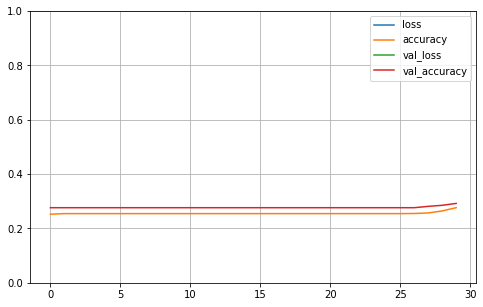

In [104]:
# Model 1

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

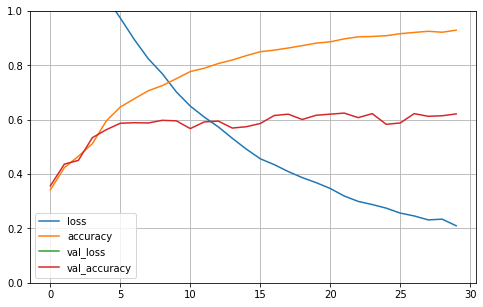

In [105]:
# Model 2: overfit

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Temp

In [106]:
df.dtypes

doc_title           object
doc_description     object
Job Family          object
Job Function        object
title_desc          object
clean_title_desc    object
word_count           int64
dtype: object